In [1]:
%matplotlib inline
import os
from collections import defaultdict, OrderedDict
import settings
from matplotlib import pylab as plt
import numpy as np
from nltk import stem

In [2]:
base_path = os.path.join(settings.project_root, 'tmp', 'data_files')

In [3]:
humor_file = os.path.join(base_path,'Humor.csv')
family_file = os.path.join(base_path,'Family.csv')
romance_file = os.path.join(base_path,'Romance.csv')
sci_fi_file = os.path.join(base_path,'Sci-Fi.csv')
supernatural_file = os.path.join(base_path,'Supernatural.csv')

In [4]:
STOPWORDS = """
a about above across after afterwards again against all almost alone along already also although always am among amongst amoungst amount an and another any anyhow anyone anything anyway anywhere are around as at back be
became because become becomes becoming been before beforehand behind being below beside besides between beyond bill both bottom but by call can
cannot cant co computer con could couldnt cry de describe
detail did didn do does doesn doing don done down due during
each eg eight either eleven else elsewhere empty enough etc even ever every everyone everything everywhere except few fifteen
fify fill find fire first five for former formerly forty found four from front full further get give go
had has hasnt have he hence her here hereafter hereby herein hereupon hers herself him himself his how however hundred i ie
if in inc indeed interest into is it its itself keep last latter latterly least less ltd
just
kg km
made make many may me meanwhile might mill mine more moreover most mostly move much must my myself name namely
neither never nevertheless next nine no nobody none noone nor not nothing now nowhere of off
often on once one only onto or other others otherwise our ours ourselves out over own part per
perhaps please put rather re
quite
rather really regarding
same say see seem seemed seeming seems serious several she should show side since sincere six sixty so some somehow someone something sometime sometimes somewhere still such system take ten
than that the their them themselves then thence there thereafter thereby therefore therein thereupon these they thick thin third this those though three through throughout thru thus to together too top toward towards twelve twenty two un under
until up unless upon us used using
various very very via
was we well were what whatever when whence whenever where whereafter whereas whereby wherein whereupon wherever whether which while whither who whoever whole whom whose why will with within without would yet you
your yours yourself yourselves
"""
STOPWORDS = frozenset(w for w in STOPWORDS.split() if w)

In [9]:
def get_frequencies(infile, remove_stops=True):
    stemmer = stem.PorterStemmer()
    token_dict = defaultdict(int)
    for line in open(infile, 'r'):
        for token in line.split(',')[1].split():
            if not token.lower() in STOPWORDS and len(token) > 3:
                token_dict[stemmer.stem(token.lower())] += 1
    token_dict = OrderedDict((item, token_dict[item]) for item in 
                             sorted(token_dict, key=token_dict.get, reverse=True))
    return token_dict

In [10]:
def plot_data(hist):
    plt.figure(figsize=(20,10))
    X = np.arange(len(hist))
    plt.bar(X, hist.values(), align='center', width=0.5)
    plt.xticks(X, hist.keys())
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    ymax = max(hist.values()) + 100
    plt.ylim(0, ymax)
    plt.show()

In [11]:
def get_top_words(indict, n=10, m=0):
    return OrderedDict((key,value) for key, value in indict.items()[m:n+m])

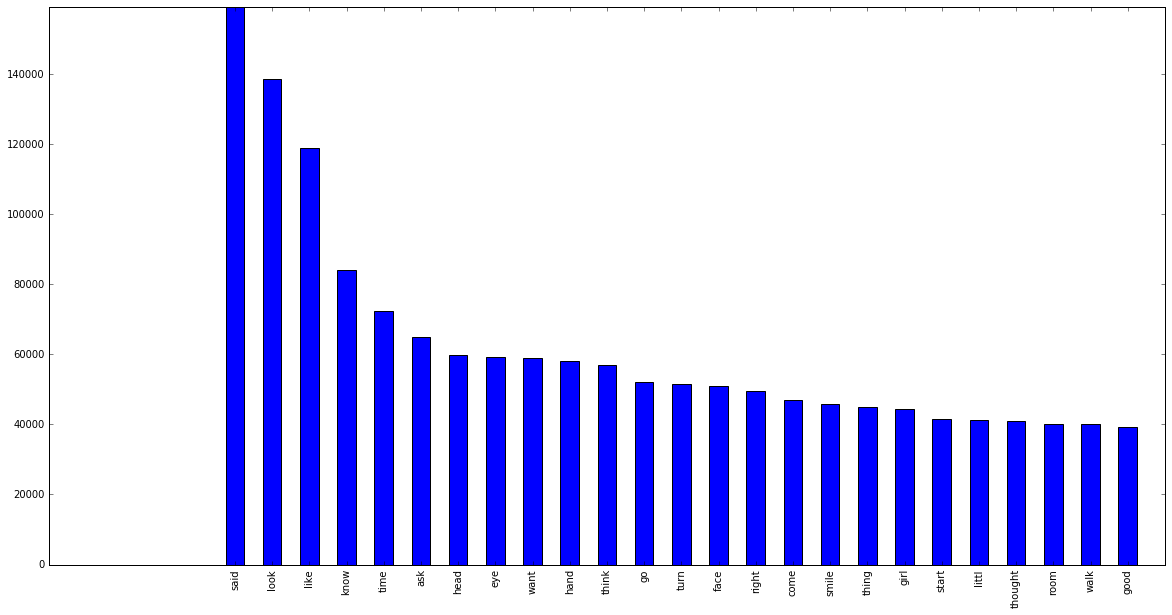

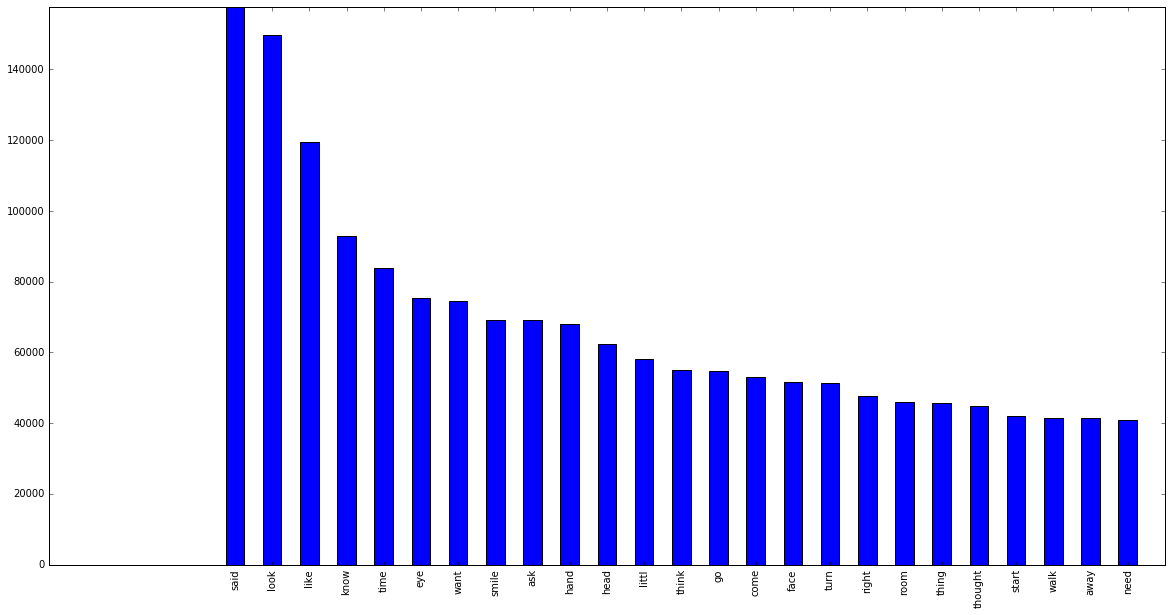

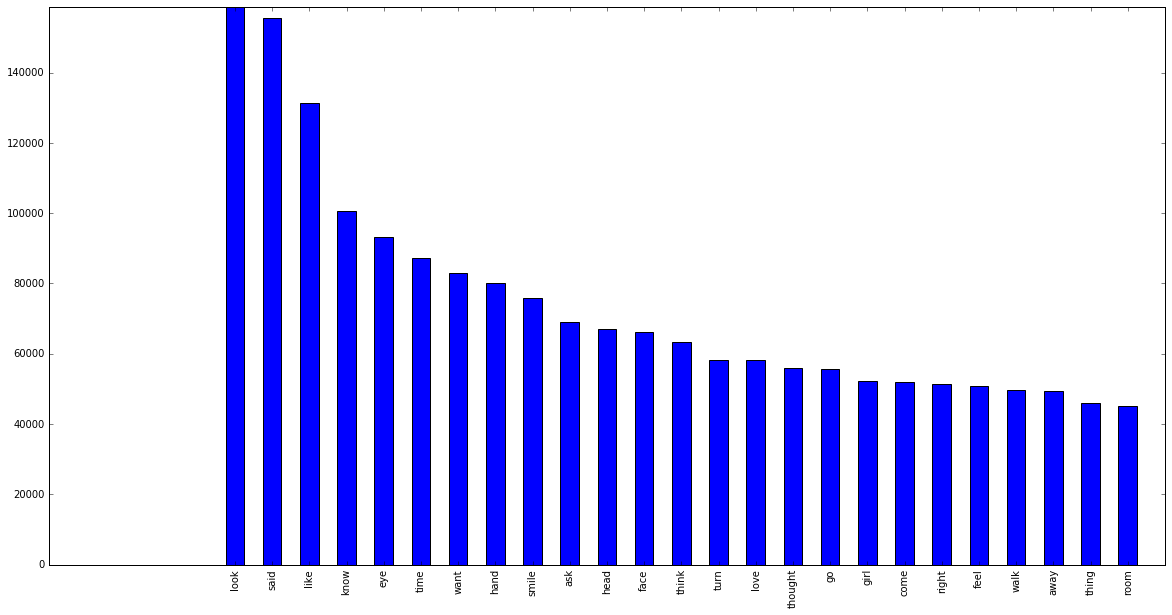

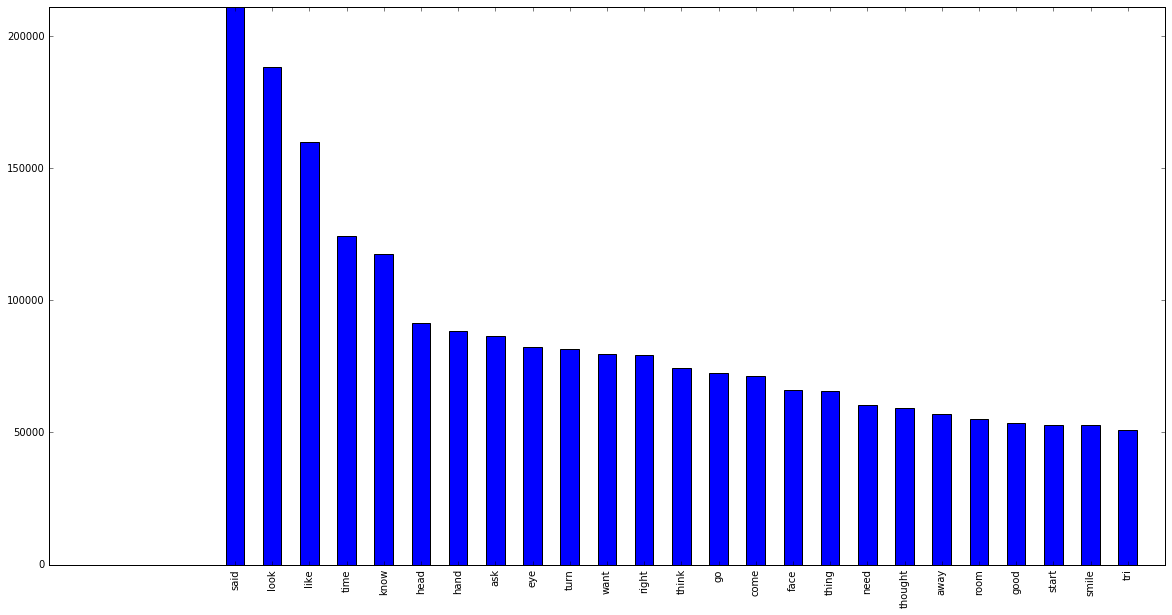

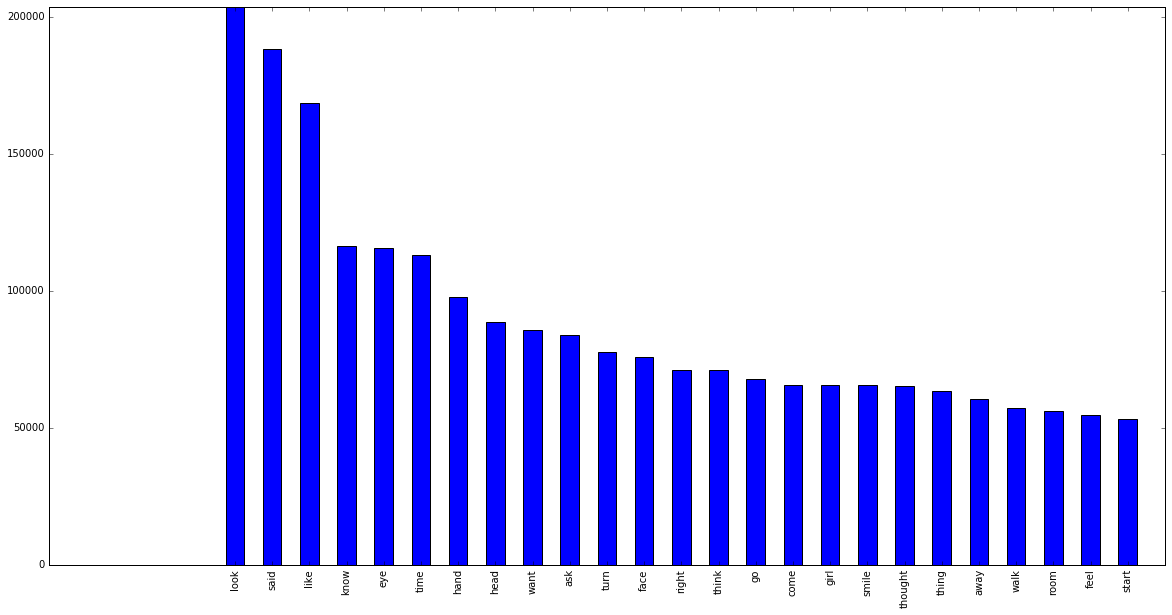

In [12]:
for data_file in [humor_file,family_file,romance_file,sci_fi_file,supernatural_file]:
    freq_data = get_frequencies(data_file)
    freq_data = get_top_words(freq_data, n=25, m=0)
    plot_data(freq_data)

In [17]:
def jensen_shannon(u, v):
    u = np.array(u)
    v = np.array(v)
    _u = u / norm(u, ord=1)
    _v = v / norm(v, ord=1)
    _M = 0.5 * (_u + _v)
    d = 0.5 * (entropy(_u, _M) + entropy(_v, _M))
    if np.isinf(d):
        d = 0
    return d

In [74]:
from scipy.sparse import csc_matrix
from sklearn.metrics import pairwise_distances
from scipy.stats import entropy
from numpy.linalg import norm
import numpy as np

In [75]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
s_matrix = csr_matrix((data, (row, col)), shape=(3, 3))

In [76]:
s_matrix = csc_matrix(np.eye(3))

In [77]:
s_matrix.toarray()

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [78]:
def jaccard_similarities(mat):
    cols_sum = mat.getnnz(axis=0)
    ab = mat.T * mat

    # for rows
    aa = np.repeat(cols_sum, ab.getnnz(axis=0))
    # for columns
    bb = cols_sum[ab.indices]

    similarities = ab.copy()
    similarities.data /= (aa + bb - ab.data)

    return similarities

In [79]:
jaccard_similarities(s_matrix).toarray()

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])